In [140]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Titanic dataset

**Classification problem**

In [141]:
data = pd.read_csv('./data/titanic_train.csv')
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [142]:
data.sort_values(by='Ticket').head()

PassengerId  Survived  Pclass  \
504          505         1       1   
257          258         1       1   
759          760         1       1   
262          263         0       1   
558          559         1       1   

                                                  Name     Sex   Age  SibSp  \
504                              Maioni, Miss. Roberta  female  16.0      0   
257                               Cherry, Miss. Gladys  female  30.0      0   
759  Rothes, the Countess. of (Lucy Noel Martha Dye...  female  33.0      0   
262                                  Taussig, Mr. Emil    male  52.0      1   
558             Taussig, Mrs. Emil (Tillie Mandelbaum)  female  39.0      1   

     Parch  Ticket   Fare Cabin Embarked  
504      0  110152  86.50   B79        S  
257      0  110152  86.50   B77        S  
759      0  110152  86.50   B77        S  
262      1  110413  79.65   E67        S  
558      1  110413  79.65   E67        S

In [143]:
data['Survived'].value_counts(normalize=True) * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [144]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Imbalanced

In [145]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, Binarizer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
categorical_features = ['Sex',]
numerical_features = ['Age', 'SibSp', 'Parch']
pipeline = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(), categorical_features),
        (StandardScaler(), numerical_features),
        remainder='passthrough', verbose_feature_names_out=False),
)
model = pipeline.fit(data.iloc[:, 1:], data.Survived)
t = pipeline[0]
t.get_feature_names_out()

array(['Sex_female', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Survived',
       'Pclass', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype=object)

In [146]:
profile = ProfileReport(data, explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [147]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

/home/i.kozlov/venv/mlcourse/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


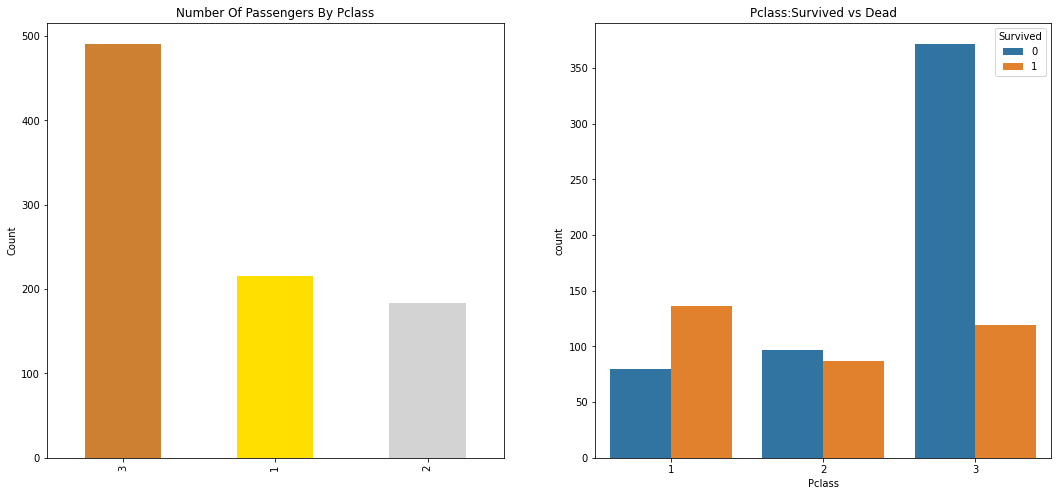

In [148]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

Pcalss(Ticket class) highly correlated with survived and age.. Looks like survived more people from the first class. Fare is higly corelated with Pclass, but its logical as pcalss price higher for best class. We can delete one of that column. Also, we dont need name and ticket. Cabin has a lot of missing values. Sublungs and parents also highly corelated, maybe need to be deleted\additional feature created.
##  **Metric** <br>
F1 score, that balance precision and recal. We need to maximize how many true positives we found (recall), and how many positives from our prediction are true positives (recall)<br>
##  **Validation** <br>
K-fold cross-valdation. I think no need to strarify it, as there are two classes and they well represented. SOme options to deal with imbalance might be to set up class weights to the model.

In [149]:
data.drop(columns=['Name', 'Fare', 'PassengerId', 'Cabin', 'Ticket', 'Embarked'], axis = 1, inplace=True)

In [150]:
data.dropna(inplace=True)

In [151]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [152]:
data.Age.isnull().sum()

0

## Decision tree

In [153]:
categorical_features = ['Sex',]
numerical_features = ['Age', 'SibSp', 'Parch']
ct = make_column_transformer(
        (OneHotEncoder(), categorical_features),
        (StandardScaler(), numerical_features),
        remainder='passthrough', verbose_feature_names_out=True)
data_transformed = ct.fit_transform(data.iloc[:, 1:])
ct.get_feature_names_out()

array(['onehotencoder__Sex_female', 'onehotencoder__Sex_male',
       'standardscaler__Age', 'standardscaler__SibSp',
       'standardscaler__Parch', 'remainder__Pclass'], dtype=object)

In [154]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

param_grid = {"max_depth": range(1, 5, 1),
             "min_samples_leaf": range(2, 10, 1),
             "min_samples_split":  range(2, 10, 1),
             "criterion": ['gini', 'entropy']}

n_folds = 5

grid_search = GridSearchCV(estimator = DecisionTreeClassifier(),
                          param_grid = param_grid,
                          cv = StratifiedKFold(n_splits=10),
                          verbose = 1)

# Fit the grid Search to the data
grid_search.fit(data_transformed, data.Survived)

Fitting 10 folds for each of 512 candidates, totalling 5120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 5),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [155]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.001221      0.000286         0.000487        0.000110   
1       0.001417      0.000476         0.000522        0.000124   
2       0.001217      0.000291         0.000498        0.000106   
3       0.001078      0.000260         0.000446        0.000085   
4       0.000866      0.000113         0.000359        0.000033   
5       0.000874      0.000246         0.000395        0.000100   
6       0.000966      0.000219         0.000435        0.000125   
7       0.000945      0.000152         0.000429        0.000075   
8       0.000878      0.000233         0.000363        0.000050   
9       0.000872      0.000149         0.000367        0.000057   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               1                      2   
1            gini               1                      2   
2            gini               1                      2   
3            gini               1                      2   
4            gini               1                      2   
5            gini               1                      2   
6            gini               1                      2   
7            gini               1                      2   
8            gini               1                      3   
9            gini               1                      3   

  param_min_samples_split                                             params  \
0                       2  {'criterion': 'gini', 'max_depth': 1, 'min_sam...   
1                       3  {'criterion': 'gini', 'max_depth': 1, 'min_sam...   
2                       4  {'criterion': 'gini', 'max_depth': 1, 'min_sam...   
3                       5  {'criterion': 'gini', 'max_depth': 1, 'min_sam...   
4                       6  {'criterion': 'gini', 'max_depth': 1, 'min_sam...   
5                       7  {'criterion': 'gini', 'max_depth': 1, 'min_sam...   
6                       8  {'criterion': 'gini', 'max_depth': 1, 'min_sam...   
7                       9  {'criterion': 'gini', 'max_depth': 1, 'min_sam...   
8                       2  {'criterion': 'gini', 'max_depth': 1, 'min_sam...   
9                       3  {'criterion': 'gini', 'max_depth': 1, 'min_sam...   

   split0_test_score  ...  split3_test_score  split4_test_score  \
0           0.819444  ...           0.833333           0.732394   
1           0.819444  ...           0.833333           0.732394   
2           0.819444  ...           0.833333           0.732394   
3           0.819444  ...           0.833333           0.732394   
4           0.819444  ...           0.833333           0.732394   
5           0.819444  ...           0.833333           0.732394   
6           0.819444  ...           0.833333           0.732394   
7           0.819444  ...           0.833333           0.732394   
8           0.819444  ...           0.833333           0.732394   
9           0.819444  ...           0.833333           0.732394   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.802817           0.746479            0.71831           0.802817   
1           0.802817           0.746479            0.71831           0.802817   
2           0.802817           0.746479            0.71831           0.802817   
3           0.802817           0.746479            0.71831           0.802817   
4           0.802817           0.746479            0.71831           0.802817   
5           0.802817           0.746479            0.71831           0.802817   
6           0.802817           0.746479            0.71831           0.802817   
7           0.802817           0.746479            0.71831           0.802817   
8           0.802817           0.746479            0.71831           0.802817   
9           0.802817           0.746479            0.71831           0.802817   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.788732

In [156]:
print("best accuracy: ", grid_search.best_score_)

best accuracy:  0.8039123630672927


In [157]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)


In [55]:
data_transformed

array([[ 0.        ,  1.        , -0.53037664,  0.52457013, -0.50589515,
         3.        ],
       [ 1.        ,  0.        ,  0.57183099,  0.52457013, -0.50589515,
         1.        ],
       [ 1.        ,  0.        , -0.25482473, -0.55170307, -0.50589515,
         3.        ],
       ...,
       [ 1.        ,  0.        , -0.73704057, -0.55170307, -0.50589515,
         1.        ],
       [ 0.        ,  1.        , -0.25482473, -0.55170307, -0.50589515,
         1.        ],
       [ 0.        ,  1.        ,  0.15850313, -0.55170307, -0.50589515,
         3.        ]])

In [73]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import export_graphviz
from IPython.display import Image

In [124]:
ct = make_column_transformer(
        (OneHotEncoder(), categorical_features),
        #(Binarizer(), categorical_features),
        (StandardScaler(), numerical_features),
        remainder='passthrough', verbose_feature_names_out=False)
data_transformed = ct.fit_transform(data.iloc[:, 1:])
clf_tree = DecisionTreeClassifier(
    max_depth=4, min_samples_leaf=3)
model = make_pipeline(ct, clf_tree)
model.fit(data.iloc[:, 1:], data.Survived)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(), ['Sex']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Age', 'SibSp', 'Parch'])],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=3))])

In [125]:
model[0].get_feature_names_out()

array(['Sex_female', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Pclass'],
      dtype=object)

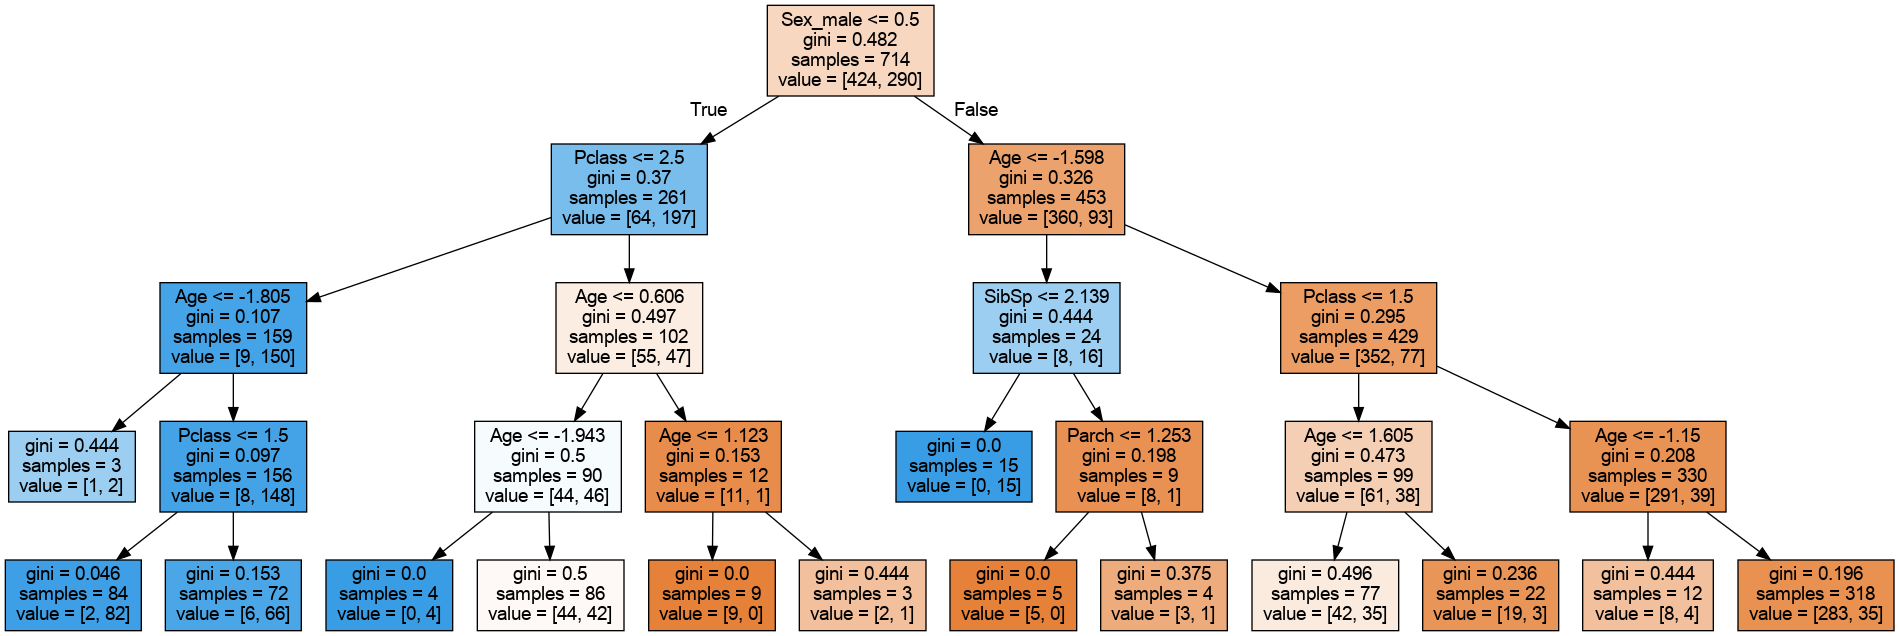

In [126]:
export_graphviz(
    model[1], 
    feature_names=model[0].get_feature_names_out(),
    out_file='small_tree.dot', 
    filled=True
)
# use for macOS / Linux
!dot -Tpng small_tree.dot -o small_tree.png

# visualize obtained tree structure
Image("small_tree.png", width=950, height=900)

In [127]:
test = pd.read_csv('./data/titanic_test.csv')
age_avg = test['Age'].mean()
test[['Age']] = test[['Age']].fillna(age_avg)
PassengerId = test['PassengerId']
y_pred = model.predict(test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']])

In [128]:
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": y_pred
    })
submission.to_csv('submission.csv', index=False)

Decision tree looks logical, as it first separate by sex_female. And most of the survived are females. Separation by pclass also looks logical, as passenger of 1st class survived more. Family survived separation looks more or less logical. Increasing depth of Decision tree increases acuracy on train, but it becomes hard to understand and test validation score decrease
Kaggle submission result: 0.77751 (depth 4, min samples leaf 3)
Higher depth improve best accuracy on Stratifiedkfold validation, but test validation score decreases